<a href="https://colab.research.google.com/github/WahyuKhairi06/BigData_2311531009_Wahyu-Khairi/blob/main/Praktikum%208/Praktikum_8_Big_Data_2311531009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
df=pd.read_csv('/content/heart_processed_new.csv')
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_2,thal_3,exang_1,fbs_1
0,0.937219,0.756938,-0.272801,0.019152,1.065587,0,1,True,False,False,True,False,False,False,False,False,False,False,True
1,-1.937566,-0.090680,0.054821,1.632621,2.096070,0,1,True,False,True,False,True,False,False,False,True,False,False,False
2,-1.495292,-0.090680,-0.831685,0.978512,0.292725,0,1,False,True,False,False,False,False,False,True,True,False,False,False
3,0.163238,-0.655759,-0.214985,1.240155,-0.222517,0,1,True,True,False,False,True,False,False,True,True,False,False,False
4,0.273807,-0.655759,2.059094,0.586046,-0.394264,0,1,False,False,False,False,True,False,False,True,True,False,True,False


In [69]:
# Pisahkan Fitur & Label

X = df.drop('target', axis=1)
y = df['target']

In [70]:
#Split Test & Traim

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=42)

In [71]:
# Model random forest default

rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)
pred_default = rf_default.predict(X_test)

acc_def = accuracy_score(y_test, pred_default)
prec_def = precision_score(y_test, pred_default)
rec_def = recall_score(y_test, pred_default)
f1_def = f1_score(y_test, pred_default)

print("\n=== Random Forest Default ===")
print("accuracy:", acc_def)
print("precision:",prec_def)
print("recall:", rec_def)
print("F1-Score:",f1_def)


=== Random Forest Default ===
accuracy: 0.85
precision: 0.896551724137931
recall: 0.8125
F1-Score: 0.8524590163934426


In [72]:
# hyperparameter tuning

rf=RandomForestClassifier(random_state=42)

In [73]:
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2,5,10]
}


In [74]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [75]:
print("Best Parameter:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best Parameter: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [76]:
acc_tuned = accuracy_score(y_test, y_pred)
prec_tuned = precision_score(y_test, y_pred)
rec_tuned = recall_score(y_test, y_pred)
f1_tuned = f1_score(y_test, y_pred)

print("\n=== Random Forest (Tuned) ===")
print("accuracy:", acc_tuned)
print("precision:",prec_tuned)
print("recall:", rec_tuned)
print("F1-Score:",f1_tuned)


=== Random Forest (Tuned) ===
accuracy: 0.85
precision: 0.896551724137931
recall: 0.8125
F1-Score: 0.8524590163934426


In [77]:
# Feature Engineering (feature importance)

importances = best_model.feature_importances_
feature_names = X.columns

fi_df = pd.DataFrame ({
    'Feature': feature_names,
    'Importance' : importances
}).sort_values(by='Importance', ascending=False)

fi_df

,Feature,Importance
5,ca,0.148690
3,thalach,0.115058
4,oldpeak,0.102831
14,thal_2,0.099665
0,age,0.088398
2,chol,0.073589
15,thal_3,0.071867
1,trestbps,0.071856
6,sex_1,0.043426
8,cp_2,0.037297


In [78]:
fi_df

,Feature,Importance
5,ca,0.148690
3,thalach,0.115058
4,oldpeak,0.102831
14,thal_2,0.099665
0,age,0.088398
2,chol,0.073589
15,thal_3,0.071867
1,trestbps,0.071856
6,sex_1,0.043426
8,cp_2,0.037297


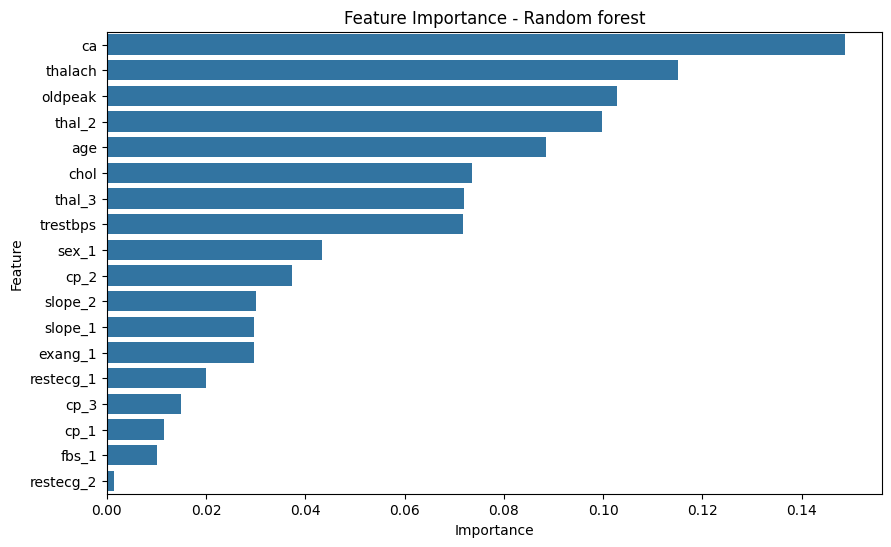

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('Feature Importance - Random forest')
plt.show()

In [80]:
# Melatih ulang dengan fitur terpenting (5)

top5_features = fi_df['Feature'].head(5).tolist()
print("\nTop 5 Features:", top5_features)


Top 5 Features: ['ca', 'thalach', 'oldpeak', 'thal_2', 'age']


In [81]:
X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]

rf_top5 = RandomForestClassifier(random_state=42)
rf_top5.fit(X_train_top5, y_train)
pred_5 = rf_top5.predict(X_test_top5)

acc_5 = accuracy_score(y_test, pred_5)
prec_5 = precision_score(y_test, pred_5)
rec_5 = recall_score(y_test, pred_5)
f1_5 = f1_score(y_test, pred_5)

print("\n=== Random Forest (Top 5 Feature) ===")
print("accuracy:", acc_5)
print("precision:",prec_5)
print("recall:", rec_5)
print("F1-Score:",f1_5)


=== Random Forest (Top 5 Feature) ===
accuracy: 0.8666666666666667
precision: 0.9
recall: 0.84375
F1-Score: 0.8709677419354839


In [82]:
results = pd.DataFrame ({
    "Model": ["RF Default", "RF Tuned (GridSearchCV)", "RF Top 5 Features"],
    "Accuracy": [acc_def, acc_tuned, acc_5],
    "Precision": [prec_def, prec_tuned, prec_5],
    "Recall": [rec_def, rec_tuned, rec_5],
    "F1-Score": [f1_def, f1_tuned, f1_5]
})

print("\n=== Tabel Perbandingan Model ===")
display(results)


=== Tabel Perbandingan Model ===


,Model,Accuracy,Precision,Recall,F1-Score
0,RF Default,0.850000,0.896552,0.81250,0.852459
1,RF Tuned (GridSearchCV),0.850000,0.896552,0.81250,0.852459
2,RF Top 5 Features,0.866667,0.900000,0.84375,0.870968


In [83]:
from sklearn.linear_model import LogisticRegression
import joblib

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

#Prediksi
pred_lr = logreg.predict(X_test)

#Evaluasi
acc_lr = accuracy_score(y_test, pred_lr)
prec_lr = precision_score(y_test, pred_lr)
rec_lr = recall_score(y_test, pred_lr)
f1_lr = f1_score(y_test, pred_lr)

print("\n=== Logistic Regression ===")
print("accuracy:", acc_lr)
print("precision:",prec_lr)
print("recall:", rec_lr)
print("F1-Score:",f1_lr)

#Save model
joblib.dump(logreg, "logreg_heart_model.joblib")
print("\nModel Logistic Regression berhasil disimpan sebagai logreg_heart_model.joblib")


=== Logistic Regression ===
accuracy: 0.8833333333333333
precision: 0.9032258064516129
recall: 0.875
F1-Score: 0.8888888888888888

Model Logistic Regression berhasil disimpan sebagai logreg_heart_model.joblib


# **UPDATE**

In [84]:
results_lr_default = pd.DataFrame({
    "Model": ["LR Default"],
    "Accuracy": [acc_lr],
    "Precision": [prec_lr],
    "Recall": [rec_lr],
    "F1-Score": [f1_lr]
})

results = pd.concat([results, results_lr_default], ignore_index=True)

print("\n=== Updated Tabel Perbandingan Model ===")
display(results)


=== Updated Tabel Perbandingan Model ===


,Model,Accuracy,Precision,Recall,F1-Score
0,RF Default,0.850000,0.896552,0.81250,0.852459
1,RF Tuned (GridSearchCV),0.850000,0.896552,0.81250,0.852459
2,RF Top 5 Features,0.866667,0.900000,0.84375,0.870968
3,LR Default,0.883333,0.903226,0.87500,0.888889


# RandomizedSearchCV Random Forest

In [85]:
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20)
}

In [86]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c751f247fe0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c752c08d160>},
                   random_state=42, scoring='accuracy', verbose=1)

In [87]:
best_random_model = random_search.best_estimator_

y_pred_random = best_random_model.predict(X_test)

acc_random = accuracy_score(y_test, y_pred_random)
prec_random = precision_score(y_test, y_pred_random)
rec_random = recall_score(y_test, y_pred_random)
f1_random = f1_score(y_test, y_pred_random)

print("\n=== Random Forest (Tuned with RandomizedSearchCV) ===")
print("Best Parameters:", random_search.best_params_)
print("Accuracy:", acc_random)
print("Precision:", prec_random)
print("Recall:", rec_random)
print("F1-Score:", f1_random)


=== Random Forest (Tuned with RandomizedSearchCV) ===
Best Parameters: {'max_depth': 30, 'min_samples_split': 3, 'n_estimators': 251}
Accuracy: 0.85
Precision: 0.8709677419354839
Recall: 0.84375
F1-Score: 0.8571428571428571


In [88]:
results_random = pd.DataFrame({
    "Model": ["RF Tuned (RandomizedSearchCV)"],
    "Accuracy": [acc_random],
    "Precision": [prec_random],
    "Recall": [rec_random],
    "F1-Score": [f1_random]
})

results = pd.concat([results, results_random], ignore_index=True)

print("\n=== Updated Tabel Perbandingan Model ===")
display(results)


=== Updated Tabel Perbandingan Model ===


,Model,Accuracy,Precision,Recall,F1-Score
0,RF Default,0.850000,0.896552,0.81250,0.852459
1,RF Tuned (GridSearchCV),0.850000,0.896552,0.81250,0.852459
2,RF Top 5 Features,0.866667,0.900000,0.84375,0.870968
3,LR Default,0.883333,0.903226,0.87500,0.888889
4,RF Tuned (RandomizedSearchCV),0.850000,0.870968,0.84375,0.857143


# Logistic Regression Hyperparameter Tuning

**GridSearchCV**

In [89]:
param_grid_lr_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)

grid_search_lr = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid_lr_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [91]:
best_lr_grid_model = grid_search_lr.best_estimator_
y_pred_lr_grid = best_lr_grid_model.predict(X_test)

acc_lr_grid = accuracy_score(y_test, y_pred_lr_grid)
prec_lr_grid = precision_score(y_test, y_pred_lr_grid)
rec_lr_grid = recall_score(y_test, y_pred_lr_grid)
f1_lr_grid = f1_score(y_test, y_pred_lr_grid)

print("\n=== Logistic Regression (Tuned with GridSearchCV) ===")
print("Best Parameters:", grid_search_lr.best_params_)
print("Accuracy:", acc_lr_grid)
print("Precision:", prec_lr_grid)
print("Recall:", rec_lr_grid)
print("F1-Score:", f1_lr_grid)

results_lr_grid = pd.DataFrame({
    "Model": ["LR Tuned (GridSearchCV)"],
    "Accuracy": [acc_lr_grid],
    "Precision": [prec_lr_grid],
    "Recall": [rec_lr_grid],
    "F1-Score": [f1_lr_grid]
})

results = pd.concat([results, results_lr_grid], ignore_index=True)

print("\n=== Updated Tabel Perbandingan Model ===")
display(results)


=== Logistic Regression (Tuned with GridSearchCV) ===
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.8833333333333333
Precision: 0.9032258064516129
Recall: 0.875
F1-Score: 0.8888888888888888

=== Updated Tabel Perbandingan Model ===


,Model,Accuracy,Precision,Recall,F1-Score
0,RF Default,0.850000,0.896552,0.81250,0.852459
1,RF Tuned (GridSearchCV),0.850000,0.896552,0.81250,0.852459
2,RF Top 5 Features,0.866667,0.900000,0.84375,0.870968
3,LR Default,0.883333,0.903226,0.87500,0.888889
4,RF Tuned (RandomizedSearchCV),0.850000,0.870968,0.84375,0.857143
5,LR Tuned (GridSearchCV),0.883333,0.903226,0.87500,0.888889


**RandomizedSearchCV**

In [92]:
from scipy.stats import uniform

param_dist_lr_random = {
    'C': uniform(loc=0.001, scale=100),
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000, 2000]
}

In [93]:
from sklearn.model_selection import RandomizedSearchCV

logreg = LogisticRegression(random_state=42)

random_search_lr = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_dist_lr_random,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c751f241490>,
                                        'max_iter': [100, 500, 1000, 2000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy', verbose=1)

In [94]:
best_lr_random_model = random_search_lr.best_estimator_
y_pred_lr_random = best_lr_random_model.predict(X_test)

acc_lr_random = accuracy_score(y_test, y_pred_lr_random)
prec_lr_random = precision_score(y_test, y_pred_lr_random)
rec_lr_random = recall_score(y_test, y_pred_lr_random)
f1_lr_random = f1_score(y_test, y_pred_lr_random)

print("\n=== Logistic Regression (Tuned with RandomizedSearchCV) ===")
print("Best Parameters:", random_search_lr.best_params_)
print("Accuracy:", acc_lr_random)
print("Precision:", prec_lr_random)
print("Recall:", rec_lr_random)
print("F1-Score:", f1_lr_random)

results_lr_random = pd.DataFrame({
    "Model": ["LR Tuned (RandomizedSearchCV)"],
    "Accuracy": [acc_lr_random],
    "Precision": [prec_lr_random],
    "Recall": [rec_lr_random],
    "F1-Score": [f1_lr_random]
})

results = pd.concat([results, results_lr_random], ignore_index=True)

print("\n=== Updated Tabel Perbandingan Model ===")
display(results)


=== Logistic Regression (Tuned with RandomizedSearchCV) ===
Best Parameters: {'C': np.float64(1.3274961159866527), 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.8833333333333333
Precision: 0.9032258064516129
Recall: 0.875
F1-Score: 0.8888888888888888

=== Updated Tabel Perbandingan Model ===


,Model,Accuracy,Precision,Recall,F1-Score
0,RF Default,0.850000,0.896552,0.81250,0.852459
1,RF Tuned (GridSearchCV),0.850000,0.896552,0.81250,0.852459
2,RF Top 5 Features,0.866667,0.900000,0.84375,0.870968
3,LR Default,0.883333,0.903226,0.87500,0.888889
4,RF Tuned (RandomizedSearchCV),0.850000,0.870968,0.84375,0.857143
5,LR Tuned (GridSearchCV),0.883333,0.903226,0.87500,0.888889
6,LR Tuned (RandomizedSearchCV),0.883333,0.903226,0.87500,0.888889


**Decsion tree**

In [95]:
from sklearn.tree import DecisionTreeClassifier

# Model decision tree default
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)
pred_dt_default = dt_default.predict(X_test)

acc_dt_def = accuracy_score(y_test, pred_dt_default)
prec_dt_def = precision_score(y_test, pred_dt_default)
rec_dt_def = recall_score(y_test, pred_dt_default)
f1_dt_def = f1_score(y_test, pred_dt_default)

print("\n=== Decision Tree Default ===")
print("accuracy:", acc_dt_def)
print("precision:",prec_dt_def)
print("recall:", rec_dt_def)
print("F1-Score:",f1_dt_def)

results_dt_default = pd.DataFrame({
    "Model": ["DT Default"],
    "Accuracy": [acc_dt_def],
    "Precision": [prec_dt_def],
    "Recall": [rec_dt_def],
    "F1-Score": [f1_dt_def]
})

results = pd.concat([results, results_dt_default], ignore_index=True)

print("\n=== Updated Tabel Perbandingan Model ===")
display(results)


=== Decision Tree Default ===
accuracy: 0.7333333333333333
precision: 0.7352941176470589
recall: 0.78125
F1-Score: 0.7575757575757576

=== Updated Tabel Perbandingan Model ===


,Model,Accuracy,Precision,Recall,F1-Score
0,RF Default,0.850000,0.896552,0.81250,0.852459
1,RF Tuned (GridSearchCV),0.850000,0.896552,0.81250,0.852459
2,RF Top 5 Features,0.866667,0.900000,0.84375,0.870968
3,LR Default,0.883333,0.903226,0.87500,0.888889
4,RF Tuned (RandomizedSearchCV),0.850000,0.870968,0.84375,0.857143
5,LR Tuned (GridSearchCV),0.883333,0.903226,0.87500,0.888889
6,LR Tuned (RandomizedSearchCV),0.883333,0.903226,0.87500,0.888889
7,DT Default,0.733333,0.735294,0.78125,0.757576


/tmp/ipython-input-586736882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='bright')


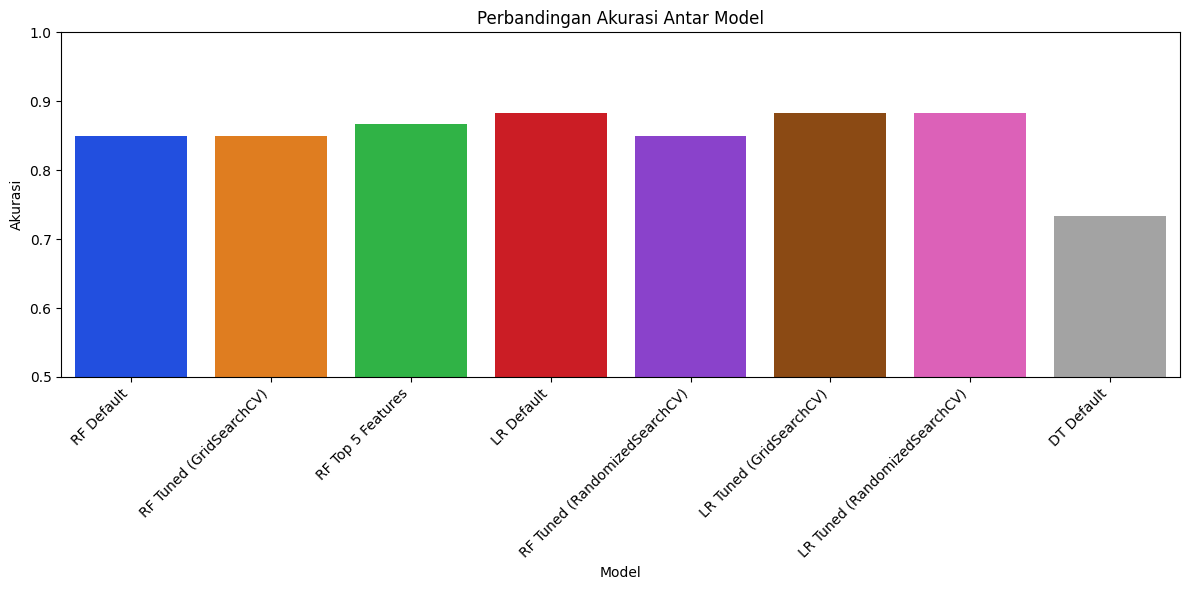

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results, palette='bright')
plt.title('Perbandingan Akurasi Antar Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()